<a href="https://colab.research.google.com/github/FranciscoAssislsj/RFM_e-commerce/blob/main/RFM_e_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 44.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7488bfcad98fef318ef86c990b6fcbab4527300d82fab4992861f8d427eab3c7
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
!pip install sidetable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.5 MB/s eta 0:00:00


In [ ]:
# Importando as bibliotecas

import pandas as pd
from ydata_profiling import ProfileReport

import missingno as msno
import sidetable as stb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import scale


In [ ]:
# Variavel 'base' recebe o dataset 'data.csv'
# O dataset mostrou erro UnicodeDecodeError por conta de caracteres especiais, o dataset não está em UTF-8
# Utilizei o 'encoding = latin1' para solucionar o erro

base = pd.read_csv('dataset.csv', sep = ',', encoding = 'latin1')

In [ ]:
base

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# Descrição dos dados

base.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Tipo dos dados

base.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [ ]:
# Gera um relatório do dataset

#base.profile_report()

In [ ]:
# Verificando valores nulos

base.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
# Valores nulos em percetual

base_missing = (
  base.isna().sum()
  .to_frame('missing_count')
  .join((base.isna().sum()/base.shape[0])
  .to_frame('missing_pct'))
  .sort_values('missing_pct',ascending = False)
)
base_missing.style.format({'missing_pct':'{:.2%}'})

,missing_count,missing_pct
CustomerID,135080,24.93%
Description,1454,0.27%
StockCode,0,0.00%
InvoiceNo,0,0.00%
Quantity,0,0.00%
InvoiceDate,0,0.00%
UnitPrice,0,0.00%
Country,0,0.00%


In [ ]:
# Dropando nulos da coluna CustomerID

base.dropna(subset = 'CustomerID', inplace = True)

In [ ]:
base.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
base['UnitPrice'].isna().sum()

np.int64(0)

In [ ]:
base.describe()

,Quantity,UnitPrice,CustomerID
count,74867.000000,74867.000000,74867.000000
mean,11.960383,3.316970,15335.475336
std,388.096766,10.556936,1757.417417
min,-74215.000000,0.000000,12346.000000
25%,2.000000,1.250000,13875.000000
50%,5.000000,1.950000,15304.000000
75%,12.000000,3.750000,16951.000000
max,74215.000000,1715.850000,18283.000000


In [ ]:
# Verificando se há dados nulos na coluna 'UnitPrice'

base['UnitPrice'].isnull().sum()

np.int64(0)

In [ ]:
# Exibindo as linhas dos valores < 0 na coluna 'UnitPrice'

base.query('UnitPrice <= 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom


In [ ]:
# Analisando se existem valores < 0 na coluna 'UnitPrice'

(base['UnitPrice'] <= 0).sum()

np.int64(40)

In [ ]:
# Nova base apenas com valores 'UnitPrice' > 0
base = base.query('UnitPrice > 0')
base

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# Verificando se há valores nulos na coluna quantidade

base['Quantity'].isnull().sum()

np.int64(0)

In [ ]:
# Exibindo linhas com valores de 'Quantity <= 0'

base.query('Quantity <= 0 ')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
# Nova base apenas com valores de 'Quantity > 0'

base = base.query('Quantity > 0')
base

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
base[base.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [ ]:
# Removendos os valores duplicados
base.drop_duplicates(inplace = True)

<ipython-input-149-44fe293bff43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base.drop_duplicates(inplace = True)


In [ ]:
base.duplicated().sum()

np.int64(0)

In [ ]:
base.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [ ]:
# Removendo as horas do 'InvoiceDate' para alterar o tipo para datetime
base['InvoiceDate'] = base['InvoiceDate'].str.replace(r'\s.*', '', regex = True)

<ipython-input-152-253f97c079af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['InvoiceDate'] = base['InvoiceDate'].str.replace(r'\s.*', '', regex = True)


In [ ]:
base

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011,4.15,12680.0,France


In [ ]:
# Alterando o formato da data para datetime (mês, dia, ano)

base['InvoiceDate'] = pd.to_datetime(base['InvoiceDate'])

<ipython-input-154-91713da29a4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['InvoiceDate'] = pd.to_datetime(base['InvoiceDate'])


In [ ]:
base.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


In [ ]:
# Alterando o tipo da colune 'CustomerID' para int

base['CustomerID'] = base['CustomerID'].astype(int)

<ipython-input-155-6b789c353ca5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['CustomerID'] = base['CustomerID'].astype(int)


In [ ]:
new_base = base
new_base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


([<matplotlib.axis.XTick at 0x7f4997130c10>,
 [Text(1, 0, 'UnitPrice'), Text(2, 0, 'Quantity')])

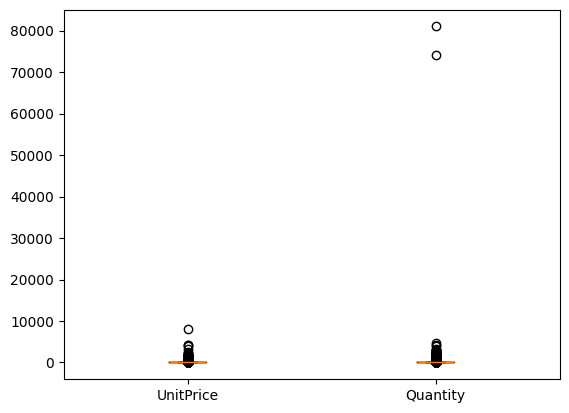

In [ ]:
# Grafico de boxplot das variaveis 'UnitPrice' e "Quantity"

plt.boxplot(new_base[['UnitPrice','Quantity']])
plt.xticks([1,2],['UnitPrice',"Quantity"])

In [ ]:
# Identificando outliers 'UnitPrice > 5000'

new_base.query('UnitPrice > 5000')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,2011-05-03,8142.75,16029,United Kingdom


In [ ]:
# Removendo os valores > 5000 da coluna 'UnitPrice'
new_base = new_base.query('UnitPrice <= 5000')

In [ ]:
# Identificando outliers 'Quantity > 10000'
new_base.query('Quantity > 10000')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09,2.08,16446,United Kingdom


In [ ]:
# Removendo os valores > 10000 da coluna 'Quantity'

new_base = new_base[new_base['Quantity'] <= 10000]

([<matplotlib.axis.XTick at 0x7f499756a410>,
 [Text(1, 0, 'UnitPrice'), Text(2, 0, 'Quantity')])

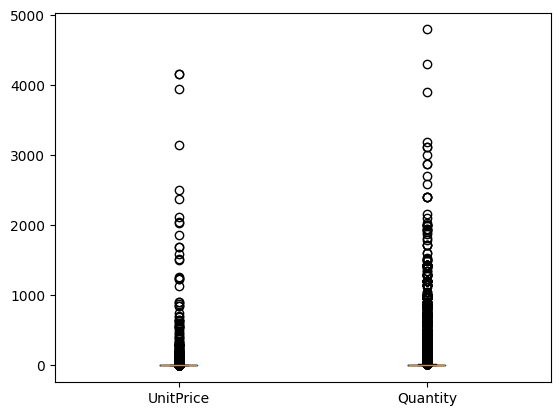

In [ ]:
plt.boxplot(new_base[['UnitPrice',"Quantity"]]);
plt.xticks([1,2],['UnitPrice',"Quantity"])

In [ ]:
# Criando nova coluna 'Total price'

new_base['TotalPrice'] = new_base['Quantity'] * new_base['UnitPrice']

In [ ]:
new_base

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France,16.60


In [ ]:
# Último valor do dataset

new_base['InvoiceDate'].max()

Timestamp('2011-12-09 00:00:00')

In [ ]:
# Top 10 países com maior valor em vendas

top10_total_sales = new_base.groupby('Country')['TotalPrice'].sum().sort_values(ascending = False).reset_index().head(10)
top10_total_sales

,Country,TotalPrice
0,United Kingdom,7031228.694
1,Netherlands,285446.340
2,EIRE,265262.460
3,Germany,228678.400
4,France,208934.310
5,Australia,138453.810
6,Spain,61558.560
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38367.830


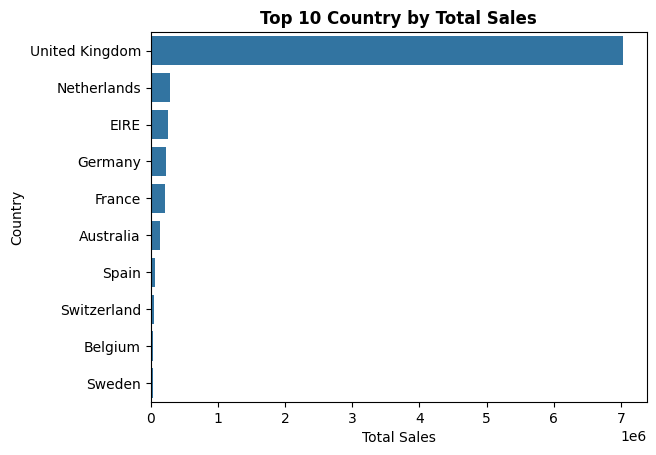

In [ ]:
# Gráfco Top 10 países com maior valor em vendas

sns.barplot(data = top10_total_sales, x = 'TotalPrice', y = 'Country', orient = 'h')
plt.xlabel('Total Sales')
plt.title('Top 10 Country by Total Sales', fontweight = 'bold', loc = 'center')
plt.show()

In [ ]:
# Top 10 produtos mais vendidos

top10_product_sales = new_base.groupby('StockCode')['Quantity'].sum().reset_index().sort_values('Quantity', ascending = False).head(10)
top10_product_sales

,StockCode,Quantity
2803,84077,54319
1088,22197,49160
3218,85099B,46078
3232,85123A,36763
3058,84879,35263
423,21212,33670
1919,23084,27153
1352,22492,26076
1469,22616,25329
910,21977,24230


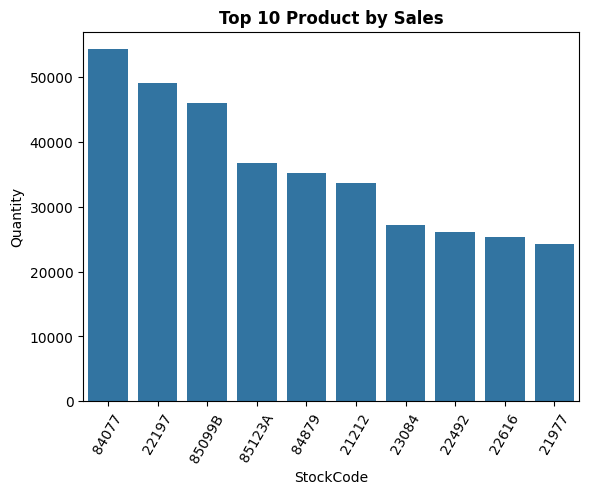

In [ ]:
# Gráfico dos Top 10 produtos mais vendidos

sns.barplot(data = top10_product_sales, x = 'StockCode', y = 'Quantity')
plt.xticks(rotation = 60)
plt.title('Top 10 Product by Sales', fontweight = 'bold', loc = 'center')
plt.show();

In [ ]:
new_base

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France,16.60


In [ ]:
new_base['Month'] = new_base['InvoiceDate'].dt.month

In [ ]:
# Valor de venda total por mês

total_venda_mes = new_base.groupby('Month')['TotalPrice'].sum().reset_index()
total_venda_mes

,Month,TotalPrice
0,1,490917.710
1,2,446084.920
2,3,594081.760
3,4,468374.331
4,5,669212.400
5,6,660046.050
6,7,598962.901
7,8,644051.040
8,9,950690.202
9,10,1035642.450


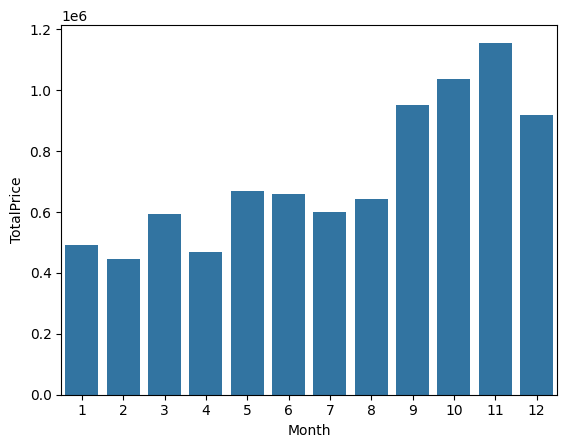

In [ ]:
# Valor de venda total por mês
sns.barplot(data = total_venda_mes, x = 'Month', y = 'TotalPrice');

In [ ]:
sales_by_month_country = new_base.groupby(['Country','Month'])['TotalPrice'].sum().reset_index()
sales_by_month_country

,Country,Month,TotalPrice
0,Australia,1,9017.71
1,Australia,2,14695.42
2,Australia,3,17223.99
3,Australia,4,771.60
4,Australia,5,13638.41
...,...,...,...
266,Unspecified,4,299.10
267,Unspecified,5,852.68
268,Unspecified,6,185.78
269,Unspecified,7,792.18


In [ ]:
top10_countries = sales_by_month_country.groupby("Country")['TotalPrice'].sum().nlargest(10).index
top10_countries

Index(['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France',
       'Australia', 'Spain', 'Switzerland', 'Belgium', 'Sweden'],
      dtype='object', name='Country')

In [ ]:
filtered_sales = sales_by_month_country[sales_by_month_country['Country'].isin(top10_countries)]

In [ ]:
filtered_sales

,Country,Month,TotalPrice
0,Australia,1,9017.710
1,Australia,2,14695.420
2,Australia,3,17223.990
3,Australia,4,771.600
4,Australia,5,13638.410
...,...,...,...
261,United Kingdom,8,497194.910
262,United Kingdom,9,794806.692
263,United Kingdom,10,821220.130
264,United Kingdom,11,975251.390


<Axes: xlabel='Month', ylabel='TotalPrice'>

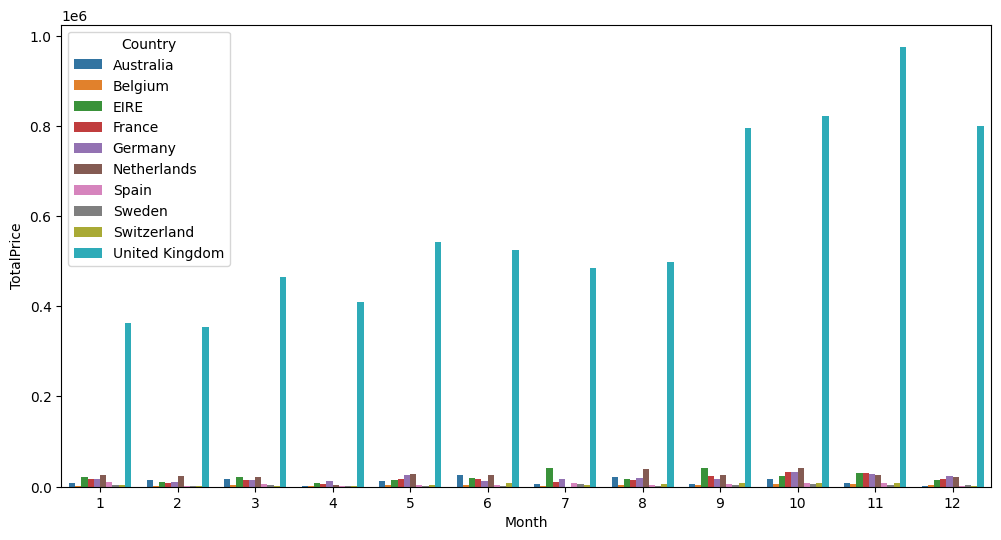

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(data = filtered_sales, x = 'Month', y = 'TotalPrice', hue = 'Country')

In [ ]:
ultima_compra = new_base['InvoiceDate'].max()
ultima_compra

Timestamp('2011-12-09 00:00:00')

In [ ]:
new_base['dias_desde_ultima_compra'] = ultima_compra - new_base['InvoiceDate']
new_base

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,dias_desde_ultima_compra
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30,12,373 days
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34,12,373 days
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00,12,373 days
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34,12,373 days
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34,12,373 days
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France,10.20,12,0 days
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France,12.60,12,0 days
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France,16.60,12,0 days
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France,16.60,12,0 days


In [ ]:
new_base.groupby(['CustomerID','InvoiceNo','InvoiceDate'])['TotalPrice'].sum()

CustomerID  InvoiceNo  InvoiceDate
12347       537626     2010-12-07      711.79
            542237     2011-01-26      475.39
            549222     2011-04-07      636.25
            556201     2011-06-09      382.52
            562032     2011-08-02      584.91
                                       ...   
18283       579673     2011-11-30      220.31
            580872     2011-12-06      208.00
18287       554065     2011-05-22      765.28
            570715     2011-10-12     1001.32
            573167     2011-10-28       70.68
Name: TotalPrice, Length: 18529, dtype: float64

In [ ]:
new_base.groupby('CustomerID')['TotalPrice'].sum()

,TotalPrice
CustomerID,
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40
12352,2506.04
...,...
18280,180.60
18281,80.82
18282,178.05


In [ ]:
ultimas = new_base.groupby('CustomerID')['InvoiceDate'].max().reset_index()
ultimas

,CustomerID,InvoiceDate
0,12347,2011-12-07
1,12348,2011-09-25
2,12349,2011-11-21
3,12350,2011-02-02
4,12352,2011-11-03
...,...,...
4332,18280,2011-03-07
4333,18281,2011-06-12
4334,18282,2011-12-02
4335,18283,2011-12-06


In [ ]:
# R(Recência) -> Dias desde a ultima compra por ID
ultimas['dias_desde_ultima_compra'] = ultima_compra - ultimas['InvoiceDate']
ultimas

,CustomerID,InvoiceDate,dias_desde_ultima_compra
0,12347,2011-12-07,2 days
1,12348,2011-09-25,75 days
2,12349,2011-11-21,18 days
3,12350,2011-02-02,310 days
4,12352,2011-11-03,36 days
...,...,...,...
4332,18280,2011-03-07,277 days
4333,18281,2011-06-12,180 days
4334,18282,2011-12-02,7 days
4335,18283,2011-12-06,3 days


In [ ]:
qtd_compras = new_base.groupby('CustomerID')['InvoiceDate'].value_counts().reset_index()
qtd_compras

,CustomerID,InvoiceDate,count
0,12347,2011-10-31,47
1,12347,2010-12-07,31
2,12347,2011-01-26,29
3,12347,2011-04-07,24
4,12347,2011-08-02,22
...,...,...,...
16755,18283,2011-02-28,29
16756,18283,2011-06-14,24
16757,18287,2011-10-12,38
16758,18287,2011-05-22,29


In [ ]:
# F(Frequência) -> Quantidade de compras por cliente

qtd_compras.groupby('CustomerID')['count'].sum()

,count
CustomerID,
12347,182
12348,31
12349,73
12350,17
12352,85
...,...
18280,10
18281,7
18282,12


In [ ]:
# Quantidade média de compras feitas pelo cliente

qtd_compras.groupby('CustomerID')['count'].mean().reset_index()

,CustomerID,count
0,12347,26.000000
1,12348,7.750000
2,12349,73.000000
3,12350,17.000000
4,12352,12.142857
...,...,...
4332,18280,10.000000
4333,18281,7.000000
4334,18282,6.000000
4335,18283,51.500000


In [ ]:
ticket = new_base.groupby(['CustomerID','InvoiceDate'])['TotalPrice'].sum().reset_index()
ticket

,CustomerID,InvoiceDate,TotalPrice
0,12347,2010-12-07,711.79
1,12347,2011-01-26,475.39
2,12347,2011-04-07,636.25
3,12347,2011-06-09,382.52
4,12347,2011-08-02,584.91
...,...,...,...
16755,18283,2011-11-30,220.31
16756,18283,2011-12-06,208.00
16757,18287,2011-05-22,765.28
16758,18287,2011-10-12,1001.32


In [ ]:
# M(Ticket médio) Ticket Médio por cliente
ticket.groupby('CustomerID')['TotalPrice'].mean()

,TotalPrice
CustomerID,
12347,615.714286
12348,449.310000
12349,1757.550000
12350,334.400000
12352,358.005714
...,...
18280,180.600000
18281,80.820000
18282,89.025000
